In [ ]:
# code for kaggle input data
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



In [93]:
import random
import numpy as np
class KMeans:
    def __init__(self,n_clusters=2,max_iter = 100):

        # step1 = deciding the no of clusters
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.centroids = None

    def fit_predict(self,X):
        # Step 2 Selecting the rendom points from the data for centroids of cluster
        random_index = random.sample(range(0,X.shape[0]),self.n_clusters)
        self.centroids = X[random_index]

        for i in range(self.max_iter):
            # assign clusters
            cluster_group = self.assign_clusters(X)
            old_centroids = self.centroids
             # move centroids
            
            self.centroids = self.move_centroids(X,cluster_group)
           
            # check finish
            if (old_centroids == self.centroids).all():
                break
        return cluster_group

    def move_centroids(self,X,cluster_group):
        new_centroids = []

        cluster_type = np.unique(cluster_group)
        for type in cluster_type:
            new_centroids.append(X[cluster_group == type].mean(axis = 0))

        return np.array(new_centroids)

    
    def assign_clusters(self,X):
        cluster_group = []
        
        distances = []

        for row in X:
            for centroid in self.centroids:
                distances.append(np.sqrt(np.dot(row-centroid,row-centroid)))
            min_distance = min(distances)
            index_pos = distances.index(min_distance)
            cluster_group.append(index_pos)
            distances.clear()
                
        return np.array(cluster_group)



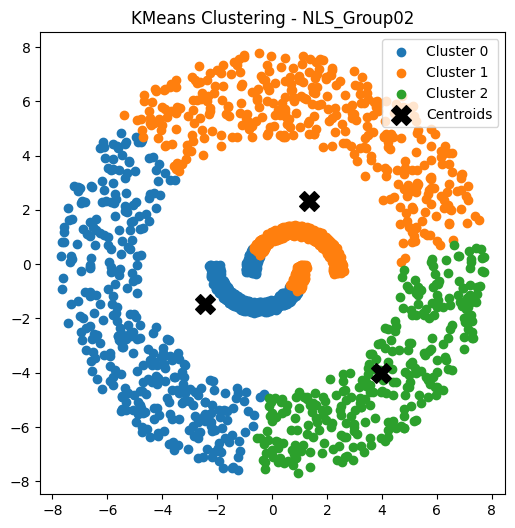

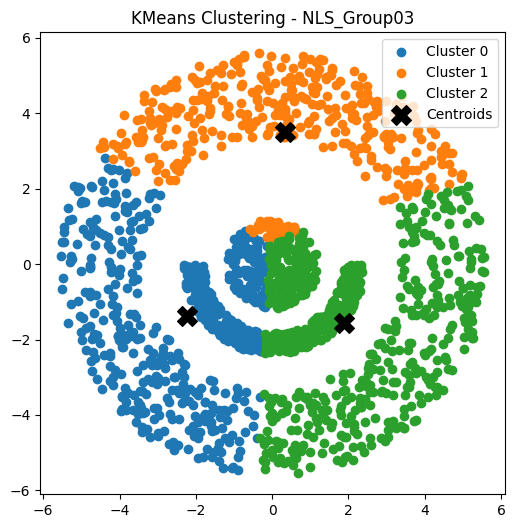

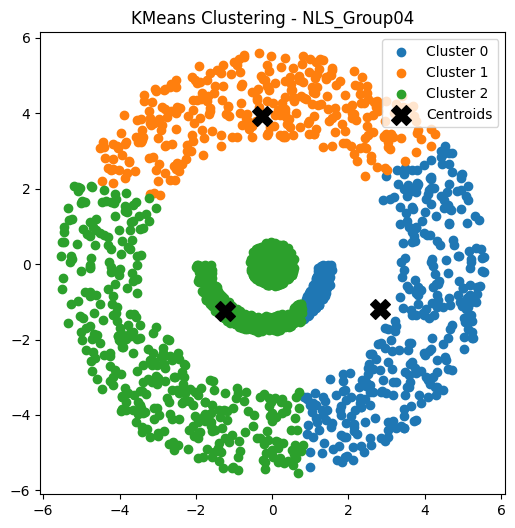

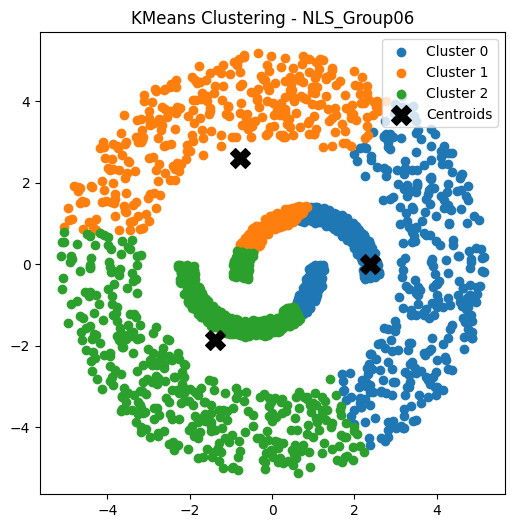

In [97]:
import matplotlib.pyplot as plt
import pandas as pd



dataFiles = ["NLS_Group02","NLS_Group03","NLS_Group04","NLS_Group06"]

for path in dataFiles:    

    data = pd.read_csv(f"/kaggle/input/pr-assignment-data-points/DATA/{path}/data.txt",sep = "\s+",header = None)
    
    X = data.values
    
    km = KMeans(n_clusters = 3,max_iter  = 100)
    y_means = km.fit_predict(X)
    
    # Plotting clusters 
    
    plt.figure(figsize=(6, 6))
    for i in range(len(centroids)):
        plt.scatter(X[y_means == i, 0], X[y_means == i, 1], label=f"Cluster {i}")
    
    
    plt.scatter(km.centroids[:, 0], km.centroids[:, 1],
                s=200, c="black", marker="X", label="Centroids")
    plt.title(f"KMeans Clustering - {path}")
    plt.legend()
    plt.show()